## Carga de Datos

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('dbProcessed.csv')
df['date'] = pd.to_datetime(df['date'])
df['Positivo'] = df['Sentimiento']
df['Negativo'] = abs(df['Sentimiento']-1)
df.drop('Sentimiento', axis=1, inplace = True)
df

,date,tweet,relevance,topic,Palabras,procTweet,Rating,Positivo,Negativo
0,2023-01-01,"Resuelto, muchísimas gracias , excelente servi...",1,misc,8,resuelto muchísimas gracias excelente servic...,5,1.0,0.0
1,2023-01-02,"Muchas gracias, espero su dm",0,misc,5,muchas gracias espero dm,5,1.0,0.0
2,2023-01-02,Muchas gracias!,0,misc,2,muchas gracias,5,1.0,0.0
3,2023-01-02,Algo similar me paso. Quería renovar mi token ...,1,misc,28,similar paso quería renovar token poder hacer...,1,0.0,1.0
4,2023-01-02,Yeeeei! a través de mi cuenta en acabo de cont...,1,misc,47,yeeeei través cuenta acabo contratar cuenta a...,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...
806,2024-04-21,"Ahora confirmo, gracias estimado",0,misc,4,ahora confirmo gracias estimado,5,1.0,0.0
807,2024-04-23,:cara_desanimada: de acuerdo!! Muchas gracias.,0,misc,5,cara_desanimada acuerdo muchas gracias,5,1.0,0.0
808,2024-04-23,"Tío cuando me van a graduar, tengo la TDC gara...",1,support,32,tío van graduar tdc garantizada hace año saqu...,5,1.0,0.0
809,2024-04-25,"una duda, con quién tengo que ver si tengo pro...",1,support,38,duda quién ver si problemas aumentar línea cr...,1,0.0,1.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       811 non-null    datetime64[ns]
 1   tweet      811 non-null    object        
 2   relevance  811 non-null    int64         
 3   topic      811 non-null    object        
 4   Palabras   811 non-null    int64         
 5   procTweet  811 non-null    object        
 6   Rating     811 non-null    int64         
 7   Positivo   811 non-null    float64       
 8   Negativo   811 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 57.2+ KB


## Histograma Doble de Análisis

In [53]:
df2 = df[['date', 'Positivo', 'Negativo']].groupby(['date']).sum()
df2.reset_index(inplace = True)
df2

,date,Positivo,Negativo
0,2023-01-01,1.0,0.0
1,2023-01-02,2.0,3.0
2,2023-01-03,3.0,0.0
3,2023-01-04,2.0,0.0
4,2023-01-05,2.0,1.0
...,...,...,...
319,2024-04-18,2.0,1.0
320,2024-04-21,1.0,0.0
321,2024-04-23,2.0,0.0
322,2024-04-25,0.0,1.0


C:\Users\juanj\AppData\Local\Temp\ipykernel_9500\747613813.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(abs(tick)) for tick in ticks])


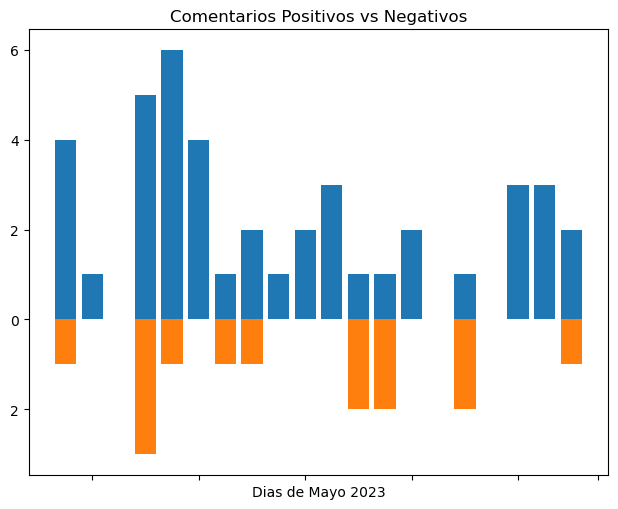

In [57]:
df2['date'] = pd.to_datetime(df2['date'])
df2['month'] = df2['date'].dt.month
df2['year'] = df2['date'].dt.year

def f_mes(n_mes,año):
    df_año = df2[df2['year']==año]
    df_mes = df_año[df_año['month']==n_mes]
    return df_mes
def grafico_comentarios(mes,año):
    fig, ax = plt.subplots()
    ax.bar(f_mes(mes,año).date, f_mes(mes,año).Positivo)
    ax.bar(f_mes(mes,año).date, f_mes(mes,año).Negativo*-1)

    if mes == 1:
        m = 'Enero'
    if mes == 2:
        m = 'Febrero'
    if mes == 3:
        m = 'Marzo'
    if mes == 4:
        m = 'Abril'
    if mes == 5:
        m = 'Mayo'
    if mes == 6:
        m = 'Junio'
    if mes == 7:
        m = 'Julio'
    if mes == 8:
        m = 'Agosto'
    if mes == 9:
        m = 'Septiembre'
    if mes == 10:
        m = 'Octubre'
    if mes == 11:
        m = 'Noviembre'
    if mes == 12:
        m = 'Diciembre'

    # Formatting x labels
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.tick_params(labelbottom=False)
    plt.tight_layout()
    plt.title('Comentarios Positivos vs Negativos')
    plt.xlabel('Dias de '+m+' '+str(año))
    #plt.ylabel('Dias')
    
    # Use absolute value for y-ticks
    ticks =  ax.get_yticks()
    ax.set_yticklabels([int(abs(tick)) for tick in ticks])
    
    plt.show()

grafico_comentarios(5, 2023)